In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/chocolate.csv")

In [3]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [5]:
print("linhas: ", df.shape[0], "colunas: ", df.shape[1])

linhas:  1795 colunas:  9


In [6]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [8]:
df.describe()

,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [10]:
df["Company\nLocation"].value_counts()

Company\nLocation
U.S.A.               764
France               156
Canada               125
U.K.                  96
Italy                 63
Ecuador               54
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary               22
Venezuela             20
Peru                  17
New Zealand           17
Madagascar            17
Japan                 17
Brazil                17
Denmark               15
Vietnam               11
Guatemala             10
Scotland              10
Argentina              9
Israel                 9
Costa Rica             9
Poland                 8
Honduras               6
Lithuania              6
South Korea            5
Nicaragua              5
Sweden                 5
Domincan Republic      5
Netherlands            4
Mexico                 4
Puerto Rico            4
Fiji                   4
Sao Tome               4
Amsterd

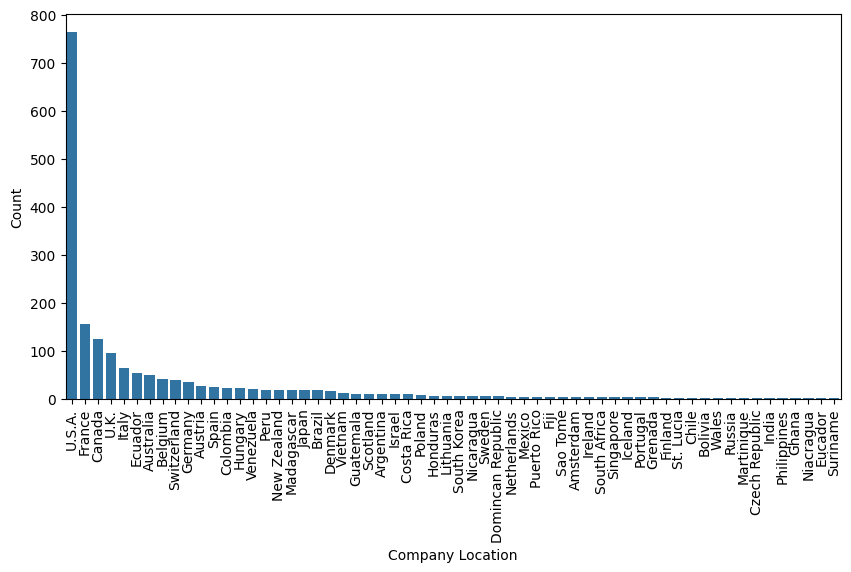

In [20]:
plt.figure(figsize=(10, 5))
location_counts = df["Company\nLocation"].value_counts().reset_index()
location_counts.columns = ["Company Location", "Count"]
sns.barplot(x="Company Location", y="Count", data=location_counts)
plt.xticks(rotation=90)
plt.show()

In [22]:
df["Cocoa\nPercent"].value_counts
df["Cocoa\nPercent"] = df["Cocoa\nPercent"].str.replace('%', '').astype(float)
correlation = df["Cocoa\nPercent"].corr(df["Rating"])
print("Correlation between Cocoa Percent and Rating:", correlation)

Correlation between Cocoa Percent and Rating: -0.1648201776242446


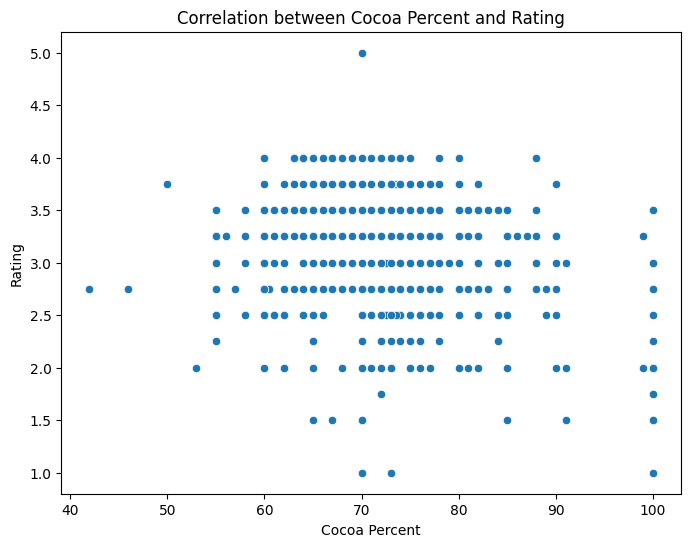

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Cocoa\nPercent", y="Rating", data=df)
plt.title("Correlation between Cocoa Percent and Rating")
plt.xlabel("Cocoa Percent")
plt.ylabel("Rating")
plt.show()

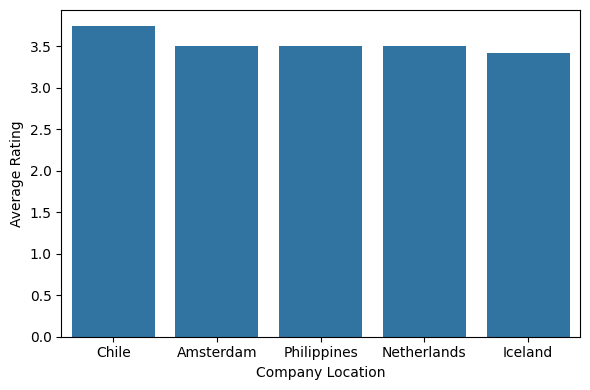

In [37]:
plt.figure(figsize=(6, 4))
# Group by location and calculate mean rating
avg_ratings = df.groupby("Company\nLocation")["Rating"].mean().reset_index()
# Sort by rating for better visualization
avg_ratings = avg_ratings.sort_values(by="Rating", ascending=False).head(5)
# Create a bar plot
sns.barplot(x="Company\nLocation", y="Rating", data=avg_ratings)
plt.xlabel("Company Location")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()